In [1]:
import numpy as np
import pymesh
from glob import glob
from sklearn import preprocessing
import math
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def distance2D(a, b):
    return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )

In [3]:
fs_mesh = np.array(sorted(glob("./out/torsos_smooth/*.ply")))

In [4]:
# fetas =[]
# for mesh_f in fs_mesh[47:48]:
#     fetas_i = [str(i)+"-feta-"+mesh_f.split("/")[-1]+".ply" for i in range(0,50)]
#     mesh_torso = pymesh.load_mesh(mesh_f) 
#     medidas = []
#     #print mesh_f
#     for f in fetas_i[36:39]:
#         mesh = pymesh.load_mesh("./out/fetas/"+f)
#         print "./out/fetas/"+f
#         output_mesh = pymesh.boolean(mesh_torso, mesh, operation="intersection",engine="auto")
#         print np.shape(output_mesh.vertices)[0]
#         if np.shape(output_mesh.vertices)[0] == 0:
#             print mesh_f
#             np.shape(output_mesh.vertices)[0]
#         pymesh.save_mesh("./out/fetas_reales/"+f,output_mesh)
#         #print(aux)
#     print "------------------------------"

In [5]:
fetas =[]
ids = []
for mesh_f in fs_mesh[:]:
    print mesh_f
    if mesh_f == "./out/torsos_smooth/model_mesh_067.ply" or mesh_f == "./out/torsos_smooth/model_mesh_062.ply" or mesh_f == "./out/torsos_smooth/model_mesh_076.ply" or mesh_f == "./out/torsos_smooth/model_mesh_108.ply" or  mesh_f == "./out/torsos_smooth/model_mesh_149.ply":
        print("omitido")
        continue
    fetas_i = [str(i)+"-feta-"+mesh_f.split("/")[-1]+".ply" for i in range(0,50)]
    #mesh_torso = pymesh.load_mesh(mesh_f) 
    medidas = []
    ids.append(re.findall(r'\d+',mesh_f)[0])
    
    for f in fetas_i:
        mesh = pymesh.load_mesh("./out/fetas_reales/"+f)
        #print "./out/fetas_reales/"+f
        #output_mesh = pymesh.boolean(mesh_torso, mesh, operation="intersection",engine="auto")
        vertexs_2d = np.delete(mesh.vertices, [1], axis=1)
        #del(mesh)
        medidas.append(vertexs_2d)
    fetas.append(medidas)
        #print(aux)

./out/torsos_smooth/model_mesh_001.ply
./out/torsos_smooth/model_mesh_002.ply
./out/torsos_smooth/model_mesh_004.ply
./out/torsos_smooth/model_mesh_005.ply
./out/torsos_smooth/model_mesh_006.ply
./out/torsos_smooth/model_mesh_009.ply
./out/torsos_smooth/model_mesh_010.ply
./out/torsos_smooth/model_mesh_011.ply
./out/torsos_smooth/model_mesh_012.ply
./out/torsos_smooth/model_mesh_013.ply
./out/torsos_smooth/model_mesh_015.ply
./out/torsos_smooth/model_mesh_016.ply
./out/torsos_smooth/model_mesh_017.ply
./out/torsos_smooth/model_mesh_018.ply
./out/torsos_smooth/model_mesh_019.ply
./out/torsos_smooth/model_mesh_020.ply
./out/torsos_smooth/model_mesh_021.ply
./out/torsos_smooth/model_mesh_024.ply
./out/torsos_smooth/model_mesh_025.ply
./out/torsos_smooth/model_mesh_026.ply
./out/torsos_smooth/model_mesh_028.ply
./out/torsos_smooth/model_mesh_030.ply
./out/torsos_smooth/model_mesh_033.ply
./out/torsos_smooth/model_mesh_034.ply
./out/torsos_smooth/model_mesh_035.ply
./out/torsos_smooth/model

In [6]:
np.shape(fetas)

(112, 50)

In [7]:
def lin_refine_implicit(x, n):
    """
    Given a 2D ndarray (npt, m) of npt coordinates in m dimension, insert 2**(n-1) additional points on each trajectory segment
    Returns an (npt*2**(n-1), m) ndarray
    """
    if n > 1:
        m = 0.5*(x[:-1] + x[1:])
        if x.ndim == 2:
            msize = (x.shape[0] + m.shape[0], x.shape[1])
        else:
            raise NotImplementedError

        x_new = np.empty(msize, dtype=x.dtype)
        x_new[0::2] = x
        x_new[1::2] = m
        return lin_refine_implicit(x_new, n-1)
    elif n == 1:
        return x
    else:
        raise ValueError


In [8]:
indi_values = []
temp_vertex = []
for i in fetas[:]:
    values = []
    for j in i:
        vertexs_2d = j
        mx = np.mean(vertexs_2d[:,0])
        my = np.mean(vertexs_2d[:,1])
        vertexs_2d = np.array(sorted(vertexs_2d, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        xy = np.vstack((vertexs_2d[:,0], vertexs_2d[:,1])).T
        xy_highres_lin = lin_refine_implicit(xy, n=3)
        n=2420
        xy= xy.flatten()
        xy_highres_lin= xy_highres_lin.flatten()
        zro = np.zeros(n)
        zro[:xy.shape[0]] = xy
        zro = zro.reshape((zro.shape[0]/2,2))
        xy_highres_lin = xy_highres_lin.reshape((xy_highres_lin.shape[0]/2,2))
        zro[xy.shape[0]/2:n/2] = xy_highres_lin[np.random.randint(xy_highres_lin.shape[0],size=abs(n/2 - xy.shape[0]/2))]
        mx = np.mean(zro[:,0])
        my = np.mean(zro[:,1])
        vertexs_2d = np.array(sorted(zro, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        temp_vertex.append(vertexs_2d)
        values.append(np.array(vertexs_2d).flatten())
    indi_values.append(np.array(values).flatten())

In [9]:
np.shape(indi_values)

(112, 121000)

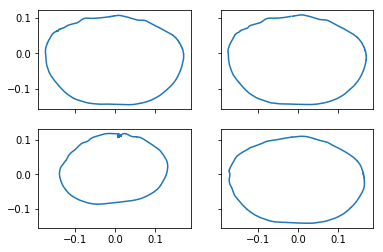

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(temp_vertex[0][:,0],temp_vertex[0][:,1],"-")

ax2.plot(temp_vertex[1][:,0],temp_vertex[1][:,1],"-")

ax3.plot(temp_vertex[-1][:,0],temp_vertex[-1][:,1],"-")

ax4.plot(temp_vertex[3][:,0],temp_vertex[3][:,1],"-")

plt.show()

In [11]:
fetas_outl = np.array(indi_values)

In [12]:
fetas_outl.shape

(112, 121000)

In [13]:
p = fetas_outl.reshape(112,fetas_outl.shape[1]/2,2)

In [14]:
p.shape

(112, 60500, 2)

In [15]:
from scipy.spatial import procrustes

In [16]:
pcentro = p.mean(0)

In [17]:
procrusteados = []
for p1 in p:
    mtx1,mtx2, disparity = procrustes(pcentro,p1)
    procrusteados.append(mtx2)
    #print(round(disparity))

In [18]:
np.shape(procrusteados)

(112, 60500, 2)

In [19]:
p = procrusteados[6]

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

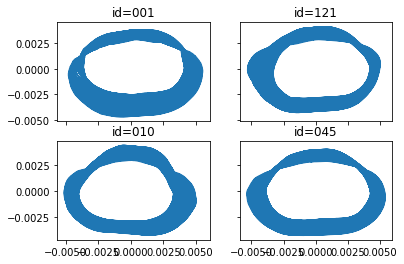

In [21]:
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrusteados[88][:,0],procrusteados[88][:,1],"-")
ax2.set_title("id="+ids[88])
ax3.plot(procrusteados[6][:,0],procrusteados[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrusteados[32][:,0],procrusteados[32][:,1],"-")
ax4.set_title("id="+ids[32])

# ax1.plot(x, y)
# ax1.set_title('Sharing x per column, y per row')
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

#plt.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
#plt.plot(procrusteados[5][:,0],procrusteados[5][:,1],"-")
#plt.plot(procrusteados[6][:,0],procrusteados[6][:,1],"-")
plt.show()

In [22]:
fetas_outl = np.array(procrusteados)

In [23]:
fetas_outl =fetas_outl.reshape(fetas_outl.shape[0],fetas_outl.shape[1]*2)

In [24]:
from sklearn import decomposition

In [25]:
pca = decomposition.PCA(n_components=50,svd_solver='full')
pca.fit(fetas_outl)
print "Con n_components = {} el valor es: {} ".format(50,pca.explained_variance_ratio_.sum())

Con n_components = 50 el valor es: 0.862885509629 


In [26]:
x_out = pca.transform(fetas_outl)
x_out.shape

(112, 50)

In [27]:
pca.explained_variance_ratio_

array([ 0.23580277,  0.09389337,  0.03915447,  0.03582763,  0.03160388,
        0.0261048 ,  0.02440069,  0.02073092,  0.01885652,  0.01763783,
        0.01620881,  0.01510567,  0.01477107,  0.01324175,  0.01234885,
        0.01182745,  0.01156201,  0.01060881,  0.0103917 ,  0.00981976,
        0.00968397,  0.00917789,  0.00890145,  0.00866953,  0.00863218,
        0.00824096,  0.00792757,  0.00761482,  0.00742079,  0.00711569,
        0.00696838,  0.00688398,  0.00662369,  0.00638044,  0.00633689,
        0.0060368 ,  0.00575808,  0.00556256,  0.00554332,  0.0053782 ,
        0.00528521,  0.00518023,  0.00498656,  0.00494922,  0.00489961,
        0.00484205,  0.00464475,  0.00458371,  0.00452023,  0.00423802])

In [28]:
np.shape(ids)

(112,)

In [29]:
ids_utilizados = map(lambda x: int(x),ids)

In [30]:
data = pd.read_excel("./planilla_colecta.xlsx")
#data = data[data['id'].isin(ids_utilizados)]

In [31]:
data = data[data['id'].isin(ids_utilizados)]

In [32]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return "underfat"
    if 18.5 <= bmi < 25:
        return "healthy"
    if 25 <= bmi < 30:
        return "overfat"
    if 30 <= bmi:
        return "obese"

In [33]:
sexo = data["sexo"].iloc[:].tolist() 
body_fat_range = data["Body fat range"].iloc[:].tolist() 
peso = data["peso"].iloc[:].tolist() 
altura = data["promedio altura"].iloc[:].tolist() 

In [34]:
altura = np.array(altura)/100

In [35]:
bmis = map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso,altura))

In [36]:
(peso[0] / (altura[0]*altura[0]))

23.333717859020894

In [37]:
peso[0]

62.3

In [38]:
altura[0]

1.6340000000000001

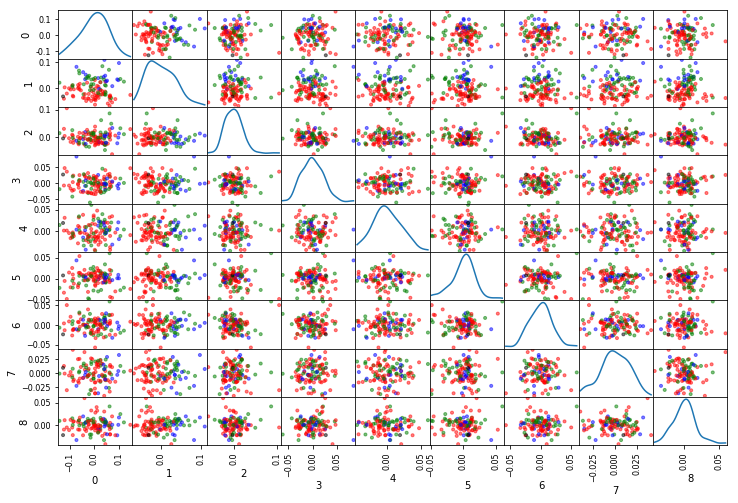

In [39]:
interest_feat = range(10)
data = pd.DataFrame(x_out)
data["labels"]= bmis
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))
pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
#pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde')
plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


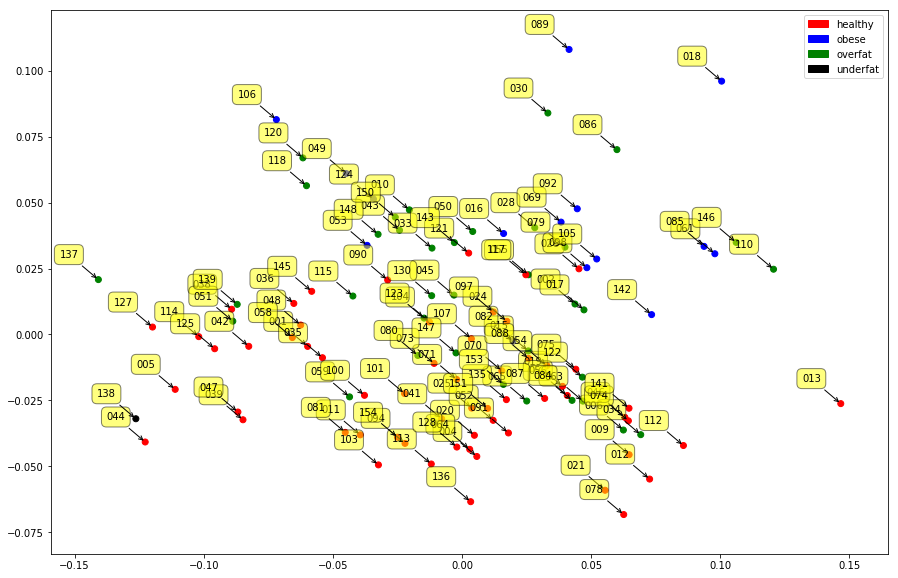

In [40]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

In [41]:
sex = {"f":"red","m":"blue"}
sex_label = map(lambda x: sex.get(x[0]),sexo)

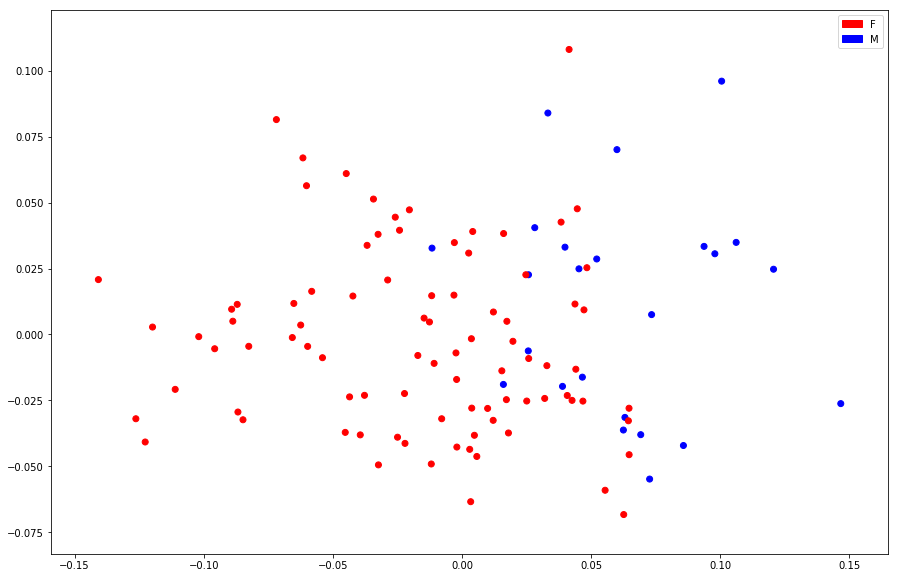

In [42]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=sex_label,marker="o")

red_patch = mpatches.Patch(color='red', label='F')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='M')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Cintura-Cadera

In [43]:
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids_utilizados)]

In [44]:
cint = np.array(data["promedio cir cin"])
cad  = np.array(data["promedio cir cad"])

In [45]:
data

,id,fecha de colecta,sexo,edad,peso,altura 1,altura 2,promedio altura,cir cin 1,cir cin 2,...,Mass,Body fat range,Fat free mass,Body water%,Mass.1,Muscle mass,observaciones,Contacto,Pass,link
0,1,2016-07-11,f,NaN,62.3,163.4,163.4,163.40,90.08,90.02,...,19.5,Healthy,42.8,51.0,31.8,40.7,NaN,antonelamartelli@gmail.com,57bb4cc873976eefb09c,https://sketchfab.com/models/37e9a098625f4db59...
1,2,2016-07-11,f,NaN,81.3,169.9,169.3,169.60,106.00,106.40,...,33.3,Obese,47.9,42.2,34.3,45.4,NaN,rociocnp@gmail.com,134e95c44f5a8170be99,https://sketchfab.com/models/de328f80141640379...
3,4,2016-07-11,f,NaN,64.7,172.3,172.3,172.30,87.00,87.20,...,18.4,Healthy,46.3,50.0,32.3,44.0,NaN,sildermolen@gmail.com,b7758641cf800c1a1b41,https://sketchfab.com/models/588f801eb8064e88a...
4,5,2016-07-11,f,NaN,64.1,166.0,166.2,166.10,81.00,81.60,...,14.6,Healthy,49.5,55.0,35.3,46.9,NaN,https://www.facebook.com/fiorella.malaspina?hc...,28c90e52684e18c75395,https://sketchfab.com/models/dcc0886c45c04c87b...
5,6,2016-07-11,m,NaN,79.2,170.6,170.5,170.60,85.50,85.30,...,11.5,Healthy,67.7,59.6,47.2,64.3,NaN,https://www.facebook.com/norman.jones.10441,47cb4e7ada2653f15c05,https://sketchfab.com/models/109f7133f51f4f098...
8,9,2016-07-11,f,NaN,63.8,167.6,167.5,167.60,83.70,84.00,...,15.1,Healthy,48.7,53.7,34.3,46.3,NaN,soulages@cenpat-conicet.gob.ar,44967cf45cc5980fe427,https://sketchfab.com/models/923799e591ab4bd49...
9,10,2016-07-11,f,NaN,67.6,160.6,160.5,160.55,97.80,98.00,...,21.4,Healthy,46.2,48.3,32.7,43.8,embarazada 5 meses,ailenchalco@cenpat-conicet.gob.ar,4b4504aab75fb387408f,https://sketchfab.com/models/0e0b6318450540aab...
10,11,2016-07-11,f,NaN,50.6,155.0,155.0,155.00,78.30,78.00,...,7.1,Underfat,43.5,59.3,30.0,41.2,NaN,gtorchio@cenpat-conicet.gob.ar,c81b4d67c432bc7135c9,https://sketchfab.com/models/6b6bb6fb754b495ba...
11,12,2016-07-11,m,NaN,81.8,190.0,190.5,190.30,93.00,92.80,...,7.9,Healthy,73.9,60.3,49.3,70.2,NaN,fede@cenpat-conicet.gob.ar,3ccaf0eea543a9ea315d,https://sketchfab.com/models/1063fcf8464246009...
12,13,2016-07-11,m,NaN,65.5,171.0,171.2,171.10,85.00,85.00,...,6.6,Healthy,58.9,61.5,40.3,55.9,NaN,jicuiti@yahoo.com.ar,e13a5662e46424e3d332,https://sketchfab.com/models/c647fef101e24e4c8...


In [46]:
ind_cint_cad = cint/cad

In [47]:
ind_cint_cad

array([ 0.89118709,  0.94694605,  0.8851626 ,  0.85624013,  0.79589935,
        0.82125367,  0.92928334,  0.83226837,  0.95087001,  0.8744856 ,
        0.8588927 ,  0.83970708,  0.92896448,  1.02126676,  0.95321337,
        0.82919412,  0.84383414,  0.88581147,  0.88481675,  0.92773537,
        0.93947368,  0.98483412,  0.95588235,  0.83148335,  0.84607104,
        0.77645788,  0.85827604,  0.75666338,  0.8455804 ,  0.91514501,
        1.00762195,  0.86615385,  0.92772187,  0.87650602,  0.8374613 ,
        0.83298969,  0.91144607,  0.98520179,  0.86119874,  0.82493225,
        0.9310987 ,  0.93368146,  0.88195452,  0.90904366,  0.90877193,
        0.80571429,  0.93672055,  0.969     ,  0.8604534 ,  0.91650391,
        0.95375723,  0.94585815,  0.94390832,  0.8254693 ,  0.84603258,
        0.89839034,  0.84188482,  0.94023324,  0.85250597,  0.82328697,
        0.91143911,  0.92426435,  1.02064667,  0.96475133,  0.93187728,
        0.83580661,  0.94582593,  0.89021739,  0.88867188,  1.01

In [48]:
colors_icc = []
for i,s,_id in zip (ind_cint_cad,sexo,ids_utilizados):
    if s == 'f':
        if i>0.71 and i < 0.84:
            print "normal-f"
            colors_icc.append("green")
        elif i<0.71:
            print "bajo-f"
            colors_icc.append("yellow")
        elif i > 0.84:
            print "alto-f"
            colors_icc.append("red")
    else:
        if i>0.78 and i < 0.94:
            print "normal-m"
            colors_icc.append("green")
        elif i<0.78:
            print "bajo-m"
            colors_icc.append("yellow")
        elif i > 0.94:
            print "alto-m"
            colors_icc.append("red")

alto-f
alto-f
alto-f
alto-f
normal-m
normal-f
alto-f
normal-f
alto-m
normal-m
normal-m
normal-f
alto-f
alto-m
alto-m
normal-f
alto-f
alto-f
alto-f
normal-m
normal-m
alto-m
alto-m
normal-m
alto-f
normal-f
alto-f
normal-f
alto-f
alto-f
alto-f
alto-f
alto-f
normal-m
normal-f
normal-f
alto-f
alto-f
alto-f
normal-f
alto-f
alto-f
normal-m
alto-f
alto-f
normal-f
normal-m
alto-f
alto-f
alto-f
alto-f
alto-f
alto-f
normal-f
alto-f
alto-f
alto-f
alto-m
alto-f
normal-f
alto-f
alto-f
alto-m
alto-m
alto-f
normal-f
alto-f
alto-f
alto-f
alto-f
alto-f
alto-f
alto-f
normal-f
alto-f
alto-f
alto-f
alto-m
alto-f
alto-f
normal-m
normal-m
normal-f
alto-f
alto-f
alto-f
alto-f
alto-f
alto-f
normal-m
alto-f
alto-f
alto-f
normal-f
alto-f
alto-f
alto-f
normal-f
alto-f
alto-f
alto-f
alto-f
normal-m
alto-f
normal-f
alto-m
alto-f
alto-f
alto-f
alto-f
normal-m
alto-f


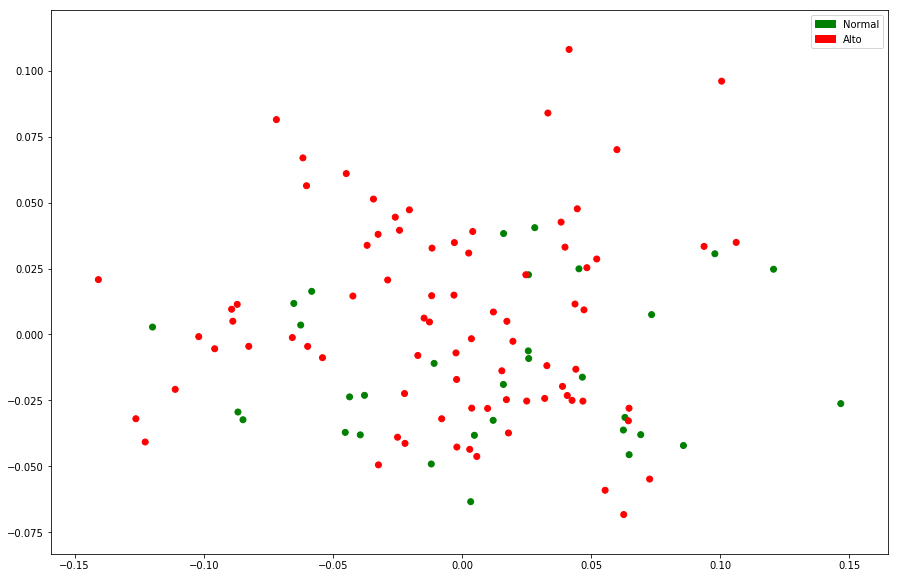

In [49]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_icc,marker="o")

red_patch = mpatches.Patch(color='green', label='Normal')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='red', label='Alto')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Talla Cintura

In [50]:
altura  = np.array(data["promedio altura"])

In [51]:
ict = cint/altura

In [52]:
altura

array([ 163.4 ,  169.6 ,  172.3 ,  166.1 ,  170.6 ,  167.6 ,  160.55,
        155.  ,  190.3 ,  171.1 ,  172.4 ,  160.5 ,  158.2 ,  162.5 ,
        175.1 ,  166.1 ,  156.7 ,  158.7 ,  164.3 ,  192.  ,  165.7 ,
        168.9 ,  165.5 ,  174.3 ,  148.4 ,  160.4 ,  153.3 ,  155.1 ,
        156.  ,  155.1 ,  158.3 ,  165.4 ,  165.4 ,  182.  ,  155.1 ,
        170.1 ,  157.5 ,  163.1 ,  161.9 ,  161.6 ,  155.5 ,  158.1 ,
        167.4 ,  176.9 ,  169.2 ,  165.6 ,  178.5 ,  157.2 ,  160.4 ,
        165.5 ,  167.2 ,  161.4 ,  154.  ,  160.45,  166.6 ,  159.4 ,
        164.1 ,  171.  ,  164.1 ,  162.5 ,  158.9 ,  165.9 ,  178.1 ,
        182.5 ,  158.8 ,  167.1 ,  147.5 ,  157.4 ,  160.2 ,  161.8 ,
        168.3 ,  160.2 ,  165.3 ,  156.2 ,  161.7 ,  158.75,  160.45,
        164.5 ,  162.7 ,  156.5 ,  187.4 ,  177.6 ,  160.3 ,  155.4 ,
        155.8 ,  163.  ,  149.6 ,  154.3 ,  167.9 ,  165.  ,  152.5 ,
        161.2 ,  160.5 ,  151.2 ,  155.3 ,  155.9 ,  160.  ,  156.4 ,
        156.4 ,  158

In [53]:
ict

array([ 0.55110159,  0.62617925,  0.50551364,  0.48946418,  0.50058617,
        0.50029833,  0.60977889,  0.50419355,  0.48817656,  0.49678551,
        0.50841067,  0.64299065,  0.5869153 ,  0.67969231,  0.52941176,
        0.49247441,  0.5       ,  0.57435413,  0.5143031 ,  0.47473958,
        0.53862402,  0.6151569 ,  0.5694864 ,  0.47274814,  0.5296496 ,
        0.44825436,  0.52935421,  0.49419729,  0.50897436,  0.54932302,
        0.62634239,  0.51058041,  0.61305925,  0.47967033,  0.52321083,
        0.4750147 ,  0.61428571,  0.67351318,  0.59017912,  0.47091584,
        0.64308682,  0.5654649 ,  0.54450418,  0.49434709,  0.5357565 ,
        0.55344203,  0.56806723,  0.61641221,  0.53241895,  0.56706949,
        0.69078947,  0.54120198,  0.50811688,  0.50701153,  0.48319328,
        0.56022585,  0.48994516,  0.56578947,  0.54418038,  0.49169231,
        0.6217747 ,  0.5774563 ,  0.73554183,  0.54739726,  0.56423174,
        0.52244165,  0.7220339 ,  0.52033037,  0.56803995,  0.72

In [54]:
89.73 * ict - 15,40

(array([ 34.45034578,  41.18706368,  30.35973883,  28.91962071,
         29.91759672,  29.89176909,  39.71545936,  30.2412871 ,
         28.80408303,  29.57656341,  30.61968968,  42.6955514 ,
         37.66390961,  45.98879077,  32.50411765,  29.18972908,
         29.865     ,  36.53679584,  31.14841753,  27.59838281,
         33.33073325,  40.19802842,  36.10001511,  27.41969019,
         32.52545822,  25.22186409,  32.49895303,  29.34432302,
         30.67026923,  34.29075435,  41.20170246,  30.81438029,
         40.00980653,  28.04081868,  31.94770793,  27.62306878,
         40.11985714,  45.43433783,  37.9567727 ,  27.25527847,
         42.70418006,  35.73916509,  33.85836022,  29.35776427,
         33.07343085,  34.66035326,  35.97267227,  40.31066794,
         32.77395262,  35.88314502,  46.98453947,  33.5620539 ,
         30.59332792,  30.49414459,  28.35693277,  35.26906524,
         28.96277879,  35.76828947,  33.8293053 ,  29.11955077,
         40.79184393,  36.81515371,  51.

In [55]:
data.columns

Index([u'id', u'fecha de colecta', u'sexo', u'edad', u'peso', u'altura 1',
       u'altura 2', u'promedio altura', u'cir cin 1', u'cir cin 2',
       u'promedio cir cin', u'cir cad 1', u'cir cad 2', u'promedio cir cad',
       u'cir muslo 1', u'cir mus 2', u'promedio cir muslo', u'cir muslo izq 1',
       u'cir muslo izq 2', u'promedio cir muslo izq', u'cir pan der 1',
       u'cinr pan der  2', u'promedio cir pan der ', u'cir pan izq 1',
       u'cinr pan izq 2', u'promedio cir pan izq', u'cir biceps der 1',
       u'cir biceps der 2', u'promedio cir biceps der ', u'cir biceps izq 1',
       u'cinr biceps izq 2', u'promedio cir biceps izq', u'pliegue subes der',
       u'pliegue subes izq', u'pliegue bicipital der ',
       u'pliegue bicipital izq', u'lateralidad', u'BMI', u'Body fat%', u'Mass',
       u'Body fat range', u'Fat free mass', u'Body water%', u'Mass.1',
       u'Muscle mass', u'observaciones', u'Contacto', u'Pass', u'link'],
      dtype='object')

In [56]:
np.array(data["Body fat%"])

array([ 31.3,  41. ,  28.4,  22.8,  14.5,  23.6,  31.7,  14.1,   9.7,
        10.1,  23.3,  46.5,  24.4,  28.2,  16.7,  11. ,  18.8,  33.3,
        30. ,  13.2,  22.2,  36.2,  26.6,  12. ,  23.1,  21.5,  27.1,
        24.7,  18.8,  22.6,  39.9,  25.5,  48. ,  11.1,  27.1,  22.6,
        39.2,  42.9,  38.6,  22.3,  40.9,  30.7,  22.5,  17.5,  29.5,
        38.7,  27.9,  35.6,  29. ,  34.5,  49. ,  30.3,  16.9,  24.4,
        23.4,  30.9,  29.2,  26.4,  31.1,  23.3,  40.7,  35.4,  48.6,
        23.3,  31.1,  32.3,  46.7,  25.4,  30.6,  45.5,  13.7,  37.6,
        50.7,  25.8,  32.8,  27.8,  32.8,  31.7,  50. ,  28.7,  21.9,
        10.4,   nan,  28.3,  37.5,  30.7,  37.3,  37.8,  35.9,  14. ,
        29.6,  41.4,  25.2,  25.1,  15.1,  36.7,  28.5,  24.8,  25.5,
        16.7,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan])

In [57]:
colors_ict = []
for i,s,_id in zip (ict,sexo,ids_utilizados):
    if s == 'f':
        if i > 0.47 and i < 0.50 :
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
    else:
        if i > 0.48 and i < 0.51:
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
         

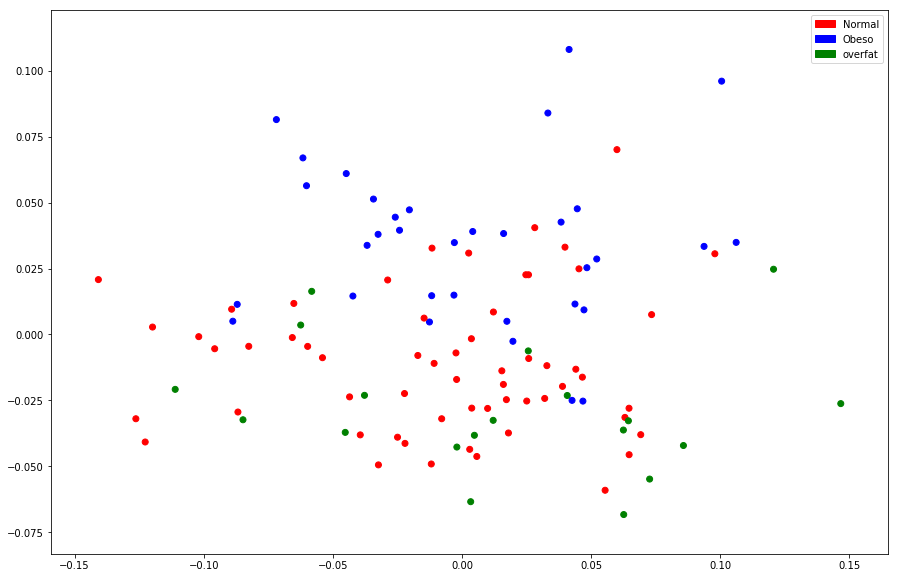

In [58]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_ict,marker="o")

red_patch = mpatches.Patch(color='red', label='Normal')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obeso')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Hombres

In [59]:
fetas_outl.shape

(112, 121000)

In [60]:
id_sexo_h = {"f": False, "m": True}
class_sexo_h = map(lambda x: id_sexo_h.get(x[0]),sexo)

In [61]:
subset_hombres = fetas_outl[np.array(class_sexo_h)]

In [62]:
pca_h = decomposition.PCA(n_components=12,svd_solver='full')
pca_h.fit(subset_hombres)
print "Con n_components = {} el valor es: {} ".format(12,pca_h.explained_variance_ratio_.sum())

Con n_components = 12 el valor es: 0.786793100349 


In [63]:
x_out_h = pca_h.transform(subset_hombres)
x_out_h.shape

(24, 12)

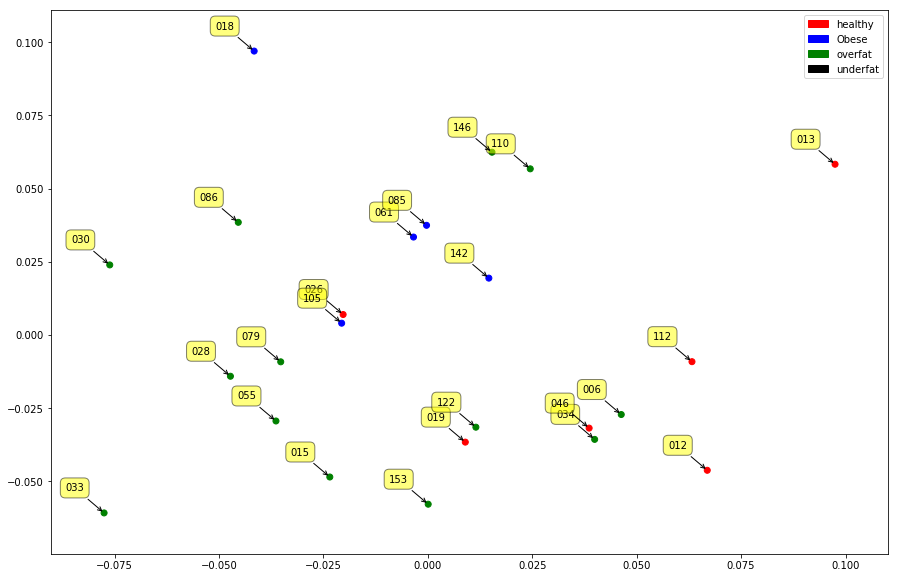

In [64]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_h[:,0],x_out_h[:,1],c=colors[np.array(class_sexo_h)],marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_h)], x_out_h[:,0], x_out_h[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.legend(loc='best')

plt.show()

# Mujeres

In [65]:
id_sexo_f = {"f": True, "m": False}
class_sexo_f = map(lambda x: id_sexo_f.get(x[0]),sexo)

In [66]:
subset_mujeres = fetas_outl[np.array(class_sexo_f)]

In [67]:
pca_h = decomposition.PCA(n_components=35,svd_solver='full')
pca_h.fit(subset_mujeres)
print "Con n_components = {} el valor es: {} ".format(35,pca_h.explained_variance_ratio_.sum())

Con n_components = 35 el valor es: 0.806646086946 


In [68]:
x_out_m = pca_h.transform(subset_mujeres)
x_out_m.shape

(88, 35)

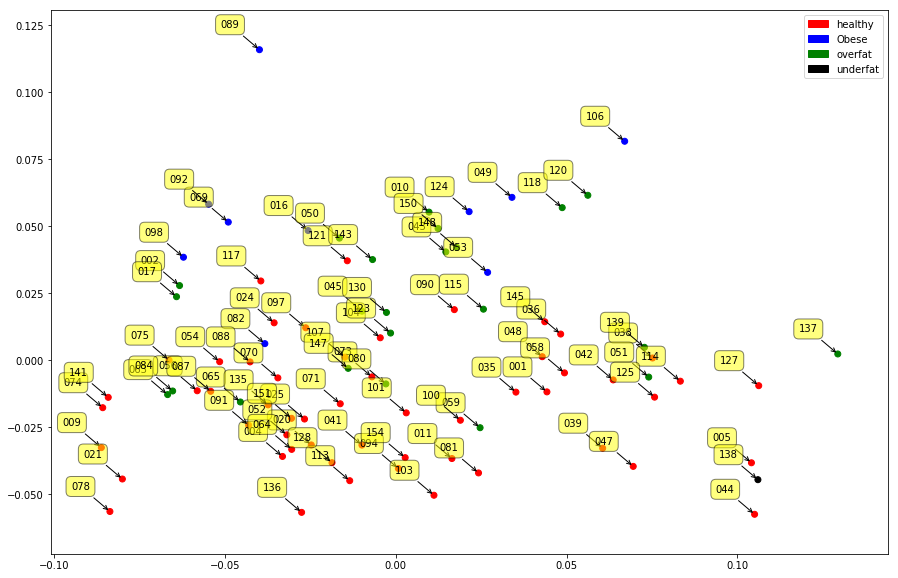

In [69]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_m[:,0],x_out_m[:,1],c=colors[np.array(class_sexo_f)],marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_f)], x_out_m[:,0], x_out_m[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Prediciendo

In [70]:
import sklearn
from sklearn.svm import SVC

In [71]:
id_bmi = {"healthy": 0, "obese": 1, "underfat":0, "overfat": 1}
bmi_c = data["labels"].map(lambda x: id_bmi.get(x)).tolist()

KeyError: 'labels'

In [ ]:
X = x_out
y = bmi_c

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
clf = SVC()
clf.fit(X_train, y_train) 

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
clf = ExtraTreesClassifier(n_estimators=200,
                           max_features=0.3,
                           #max_depth=4, #20
                           random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print classification_report(y_test, y_pred)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

In [ ]:
scores.std()

In [ ]:
scores

## Clustering

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=1,precompute_distances=False,max_iter=300)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [ ]:
n_clusters = 2

In [ ]:
fig = plt.figure(figsize=(8, 3))
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
fig = plt.figure()
ax = fig.add_subplot(111)
colors1 = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
#mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
#mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
#order = pairwise_distances_argmin(k_means_cluster_centers,
                                 # mbk_means_cluster_centers)

# KMeans
#ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors1):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
  #  t_batch, k_means.inertia_))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()